# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

From the data analysis below, we can conclude three observations:

(1) The first observation is about the relationship between city latitude and max temperature. Cities approaching equator tend to have a higher max temperature. Cities aprroaching polars tend to have a lower max temprature. City latitude may be one of the factors that affects the max temperature. 

(2) The second observation is about the relationship between city latitude and humidity. The humidity and latitude plot does not have a very clear trend. However, cities near equator still have a general high humidity compared to cities near polars. From both northern and southern latitude and humidity plots, there is no clear trend between the two factors as well. Therefore, latitude might not be the crucial factor for humidity of cities.

(3) The third observation is about relationship between city latitude and windspeed. Cities near equator tend to have a lower wind speed. Cities near polars tend to have a higher wind speed. Therefore, city latitube may be one important factor that affects the wind speed.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval")
print("------------------------------")

url="http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+weather_api_key+"&q="

num=0
setnum=1

cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
windspeed=[]
citylist=[]

for city in cities:
    try:
        response=requests.get(url+city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        citylist.append(response['name'])
        if num>48:
            setnum += 1
            num = 0
        else:
            num += 1
        print(f"Processing Record {num} of set {setnum} | {city}")
    except KeyError:
        print("City not found. Skipping...")
        
print("------------------------------") 
print("Data Retrieval Complete ")
print("------------------------------") 

Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1 | rorvik
Processing Record 2 of set 1 | hithadhoo
Processing Record 3 of set 1 | bowen
Processing Record 4 of set 1 | kaitangata
Processing Record 5 of set 1 | harnosand
Processing Record 6 of set 1 | rikitea
Processing Record 7 of set 1 | hofn
Processing Record 8 of set 1 | hudiksvall
Processing Record 9 of set 1 | sioux lookout
Processing Record 10 of set 1 | bathsheba
Processing Record 11 of set 1 | avarua
Processing Record 12 of set 1 | flinders
Processing Record 13 of set 1 | mount isa
Processing Record 14 of set 1 | miandrivazo
Processing Record 15 of set 1 | hilo
Processing Record 16 of set 1 | longyearbyen
City not found. Skipping...
Processing Record 17 of set 1 | tuktoyaktuk
Processing Record 18 of set 1 | ushuaia
Processing Record 19 of set 1 | provideniya
Processing Record 20 of set 1 | ayagoz
Processing Record 21 of set 1 | nuevo progreso
Processing Record 22 of set 1 | cedral
Processing R

Processing Record 40 of set 4 | bismarck
Processing Record 41 of set 4 | tokur
City not found. Skipping...
Processing Record 42 of set 4 | kieta
Processing Record 43 of set 4 | kaeo
Processing Record 44 of set 4 | uribia
Processing Record 45 of set 4 | maltahohe
Processing Record 46 of set 4 | novovarshavka
Processing Record 47 of set 4 | qianan
Processing Record 48 of set 4 | bull savanna
Processing Record 49 of set 4 | indramayu
Processing Record 0 of set 5 | codrington
Processing Record 1 of set 5 | hami
Processing Record 2 of set 5 | sukhumi
Processing Record 3 of set 5 | tilichiki
Processing Record 4 of set 5 | krasnoselkup
Processing Record 5 of set 5 | nanakuli
City not found. Skipping...
Processing Record 6 of set 5 | husavik
Processing Record 7 of set 5 | oranjestad
Processing Record 8 of set 5 | narsaq
Processing Record 9 of set 5 | venado tuerto
Processing Record 10 of set 5 | kalmar
Processing Record 11 of set 5 | balkhash
Processing Record 12 of set 5 | cachoeira do sul
Ci

Processing Record 30 of set 8 | tanout
Processing Record 31 of set 8 | ardakan
Processing Record 32 of set 8 | bani walid
City not found. Skipping...
Processing Record 33 of set 8 | oktyabrskiy
Processing Record 34 of set 8 | kokubu
Processing Record 35 of set 8 | outram
Processing Record 36 of set 8 | chapais
Processing Record 37 of set 8 | waddan
Processing Record 38 of set 8 | maningrida
Processing Record 39 of set 8 | kaduqli
Processing Record 40 of set 8 | banda aceh
Processing Record 41 of set 8 | sukhobuzimskoye
Processing Record 42 of set 8 | mao
Processing Record 43 of set 8 | awbari
Processing Record 44 of set 8 | mirpur sakro
Processing Record 45 of set 8 | jhunjhunun
Processing Record 46 of set 8 | whitianga
Processing Record 47 of set 8 | komsomolskiy
Processing Record 48 of set 8 | carutapera
Processing Record 49 of set 8 | klaksvik
City not found. Skipping...
Processing Record 0 of set 9 | plyussa
Processing Record 1 of set 9 | russell
Processing Record 2 of set 9 | okha

Processing Record 15 of set 12 | deer lake
Processing Record 16 of set 12 | bandar-e lengeh
Processing Record 17 of set 12 | filiates
Processing Record 18 of set 12 | yichun
Processing Record 19 of set 12 | cervo
Processing Record 20 of set 12 | viiratsi
Processing Record 21 of set 12 | constitucion
Processing Record 22 of set 12 | kysyl-syr
Processing Record 23 of set 12 | ketchikan
Processing Record 24 of set 12 | guerrero negro
Processing Record 25 of set 12 | cerea
Processing Record 26 of set 12 | pedregulho
Processing Record 27 of set 12 | albanel
Processing Record 28 of set 12 | evensk
Processing Record 29 of set 12 | sapa
------------------------------
Data Retrieval Complete 
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict={"City":citylist,"Cloudiness":cloudiness,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,"Maxtemp":maxtemp,"Windspeed":windspeed}

citydata=pd.DataFrame(weather_dict)
citydata.to_csv("output data.csv")
citydata.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Maxtemp       579
Windspeed     579
dtype: int64

In [5]:
citydata.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Maxtemp,Windspeed
0,Rørvik,99,NO,1584319482,56,64.86,11.24,35.98,24.76
1,Hithadhoo,84,MV,1584319482,62,-0.60,73.08,82.99,5.88
2,Bowen,75,AU,1584319482,65,-20.02,148.23,82.99,16.11
3,Kaitangata,65,NZ,1584319482,68,-46.28,169.85,57.99,3.00
4,Härnösand,100,SE,1584319482,60,62.63,17.94,39.20,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

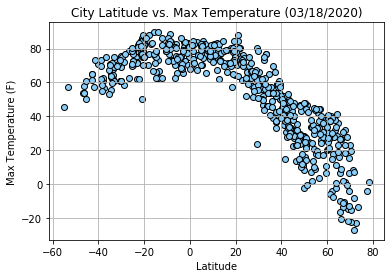

<Figure size 432x288 with 0 Axes>

In [6]:
plt.scatter(citydata["Lat"],citydata["Maxtemp"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("City Latitude vs. Max Temperature (03/18/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig("City Latitude vs. Max Temperature.png")

The code above plots the relationship between latitude and max temperature of the cities. When the latitude increases, the max temperature decreases. 

#### Latitude vs. Humidity Plot 

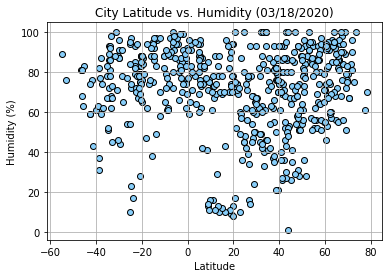

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(citydata["Lat"],citydata["Humidity"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("City Latitude vs. Humidity (03/18/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.savefig("City Latitude vs. Humidity.png")

The code above plots the relationship between latitude and humidity of the cities. When the latitude increases, the humidity almost keeps at the same level.

#### Latitude vs. Cloudiness Plot

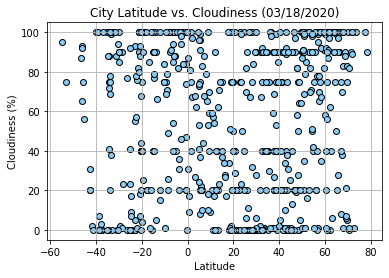

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(citydata["Lat"],citydata["Cloudiness"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("City Latitude vs. Cloudiness (03/18/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig("City Latitude vs. Cloudiness.png")

The code above plots the relationship between latitude and cloudiness of the cities. When the latitude increases, the cloudiness almost keeps at the same level.

#### Latitude vs. Wind Speed Plot

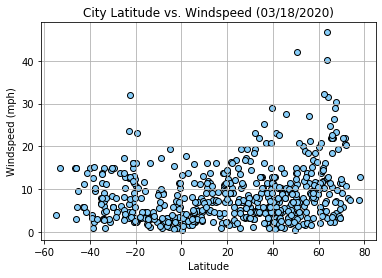

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(citydata["Lat"],citydata["Windspeed"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("City Latitude vs. Windspeed (03/18/2020)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid()
plt.show()
plt.savefig("City Latitude vs. Windspeed.png")

The code above plots the relationship between latitude and windspeed of the cities. When the latitude increases, the windspeed almost keeps at the same level.

## Linear Regression

In [116]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear (a,b):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(a, b)
    fit = slope * a + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return fit,line_eq,rvalue

In [117]:
# Create Northern and Southern Hemisphere DataFrames
north=citydata.loc[citydata["Lat"]>=0]
south=citydata.loc[citydata["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is :-0.8867294308219079


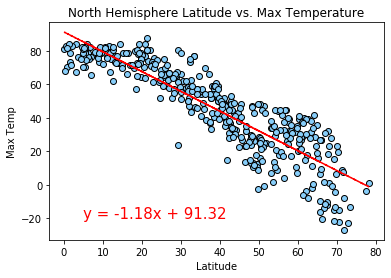

In [119]:
plt.scatter(north["Lat"],north["Maxtemp"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("North Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.plot(north["Lat"],linear(north["Lat"],north["Maxtemp"])[0],"--",color="red")
plt.annotate(linear(north["Lat"],north["Maxtemp"])[1],(5,-20),fontsize=15,color="red")
print("The r-squared is :"+str(linear(north["Lat"],north["Maxtemp"])[2]))
plt.show()


The linear regression plots the relationship between latitude and max temperature in northern hemisphere. The latitude and max temperature in northern hemisphere have a negetive correlation. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is :0.6068203840765959


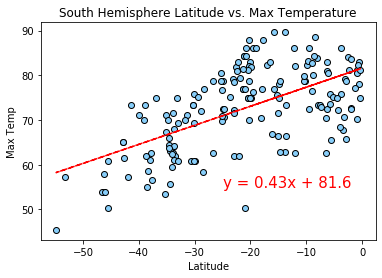

In [120]:

plt.scatter(south["Lat"],south["Maxtemp"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("South Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.plot(south["Lat"],linear(south["Lat"],south["Maxtemp"])[0],"--",color="red")
plt.annotate(linear(south["Lat"],south["Maxtemp"])[1],(-25,55),fontsize=15,color="red")
print("The r-squared is :"+str(linear(south["Lat"],south["Maxtemp"])[2]))
plt.show()


The linear regression plots the relationship between latitude and max temperature in southern hemisphere. The latitude and max temperature in southern hemisphere have a positive correlation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.1954953603933523


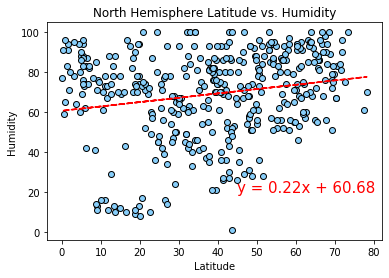

In [121]:
plt.scatter(north["Lat"],north["Humidity"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("North Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.plot(north["Lat"],linear(north["Lat"],north["Humidity"])[0],"--",color="red")
plt.annotate(linear(north["Lat"],north["Humidity"])[1],(45,20),fontsize=15,color="red")
print(linear(north["Lat"],north["Humidity"])[2])
plt.show()

The linear regression plots the relationship between latitude and humidity in northern hemisphere. The latitude and humidity in northern hemisphere do not have a strong correlation. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.25856380089906666


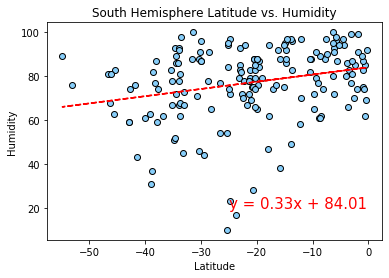

In [122]:
plt.scatter(south["Lat"],south["Humidity"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("South Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.plot(south["Lat"],linear(south["Lat"],south["Humidity"])[0],"--",color="red")
plt.annotate(linear(south["Lat"],south["Humidity"])[1],(-25,20),fontsize=15,color="red")
print(linear(south["Lat"],south["Humidity"])[2])
plt.show()

The linear regression plots the relationship between latitude and humidity in southern hemisphere. The latitude and humidity in southern hemisphere do not have a strong correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.23338794731939969


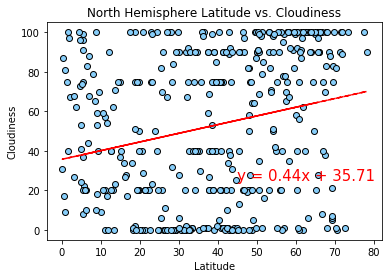

In [123]:
plt.scatter(north["Lat"],north["Cloudiness"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("North Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.plot(north["Lat"],linear(north["Lat"],north["Cloudiness"])[0],"--",color="red")
plt.annotate(linear(north["Lat"],north["Cloudiness"])[1],(45,25),fontsize=15,color="red")
print(linear(north["Lat"],north["Cloudiness"])[2])
plt.show()

The linear regression plots the relationship between latitude and cloudiness in northern hemisphere. The latitude and cloudiness in northern hemisphere do not have a strong correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.167406597791794


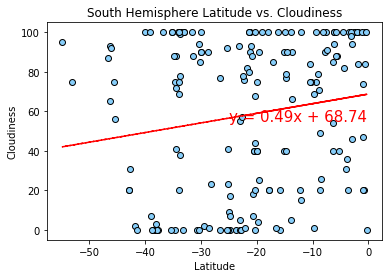

In [124]:
plt.scatter(south["Lat"],south["Cloudiness"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("South Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.plot(south["Lat"],linear(south["Lat"],south["Cloudiness"])[0],"--",color="red")
plt.annotate(linear(south["Lat"],south["Cloudiness"])[1],(-25,55),fontsize=15,color="red")
print(linear(south["Lat"],south["Cloudiness"])[2])
plt.show()

The linear regression plots the relationship between latitude and cloudiness in southern hemisphere. The latitude and cloudiness in southern hemisphere do not have a strong correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.27215241626777287


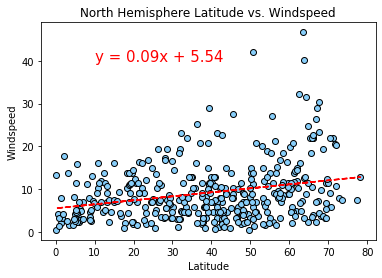

In [125]:
plt.scatter(north["Lat"],north["Windspeed"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("North Hemisphere Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

plt.plot(north["Lat"],linear(north["Lat"],north["Windspeed"])[0],"--",color="red")
plt.annotate(linear(north["Lat"],north["Windspeed"])[1],(10,40),fontsize=15,color="red")
print(linear(north["Lat"],north["Windspeed"])[2])
plt.show()

The linear regression plots the relationship between latitude and windspeed in northern hemisphere. The latitude and windspeed in northern hemisphere do not have a strong correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.24811890906119263


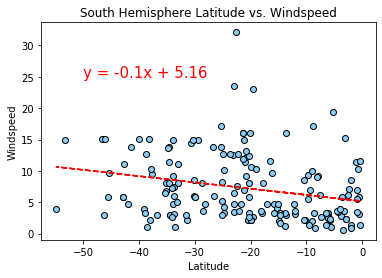

In [126]:
plt.scatter(south["Lat"],south["Windspeed"],marker="o",facecolors="lightskyblue",edgecolors="black")
plt.title("South Hemisphere Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

plt.plot(south["Lat"],linear(south["Lat"],south["Windspeed"])[0],"--",color="red")
plt.annotate(linear(south["Lat"],south["Windspeed"])[1],(-50,25),fontsize=15,color="red")
print(linear(south["Lat"],south["Windspeed"])[2])
plt.show()

The linear regression plots the relationship between latitude and windspeed in southern hemisphere. The latitude and windspeed in southern hemisphere do not have a strong correlation.